# How to make it to the NBA?

#### Milestones 1 Hacktiv8

by Muhammad Garin Anzahabi - Batch 002

Link Dashboard : https://public.tableau.com/views/Milestones1_16668773763730/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Background

![grgt](nba.png "tittle")

The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the major professional sports leagues in the United States and Canada. There are several leagues in Europe and Asia, but the NBA is regarded as the best leagues in the world. Some of the best players in the NBA today include Lebron James, Stephen Curry and Kevin Durant. The NBA is a big influence to every basketball players out there, playing in the NBA has been always a dream for every basketball player out there. So therefore i want to know what it takes to make it to the nba? what arsenal that needed to play in the nba teams?

# Problem Statement

What statistics that you must have if you want to play in the NBA based on players statistics from 2014-15 untill 2019-20 season

# Problem Explanation

1. What is the average age in the NBA?
2. How tall you have to make it to the NBA?
3. How skillfull you have to be?
4. What is the average statistic of the top ranks NBA player?

# The Data

I'll use 2 Datasets for this milestones to fill up the data i needs, here are the links:

1. https://www.kaggle.com/datasets/willyiamyu/nba-2k-ratings-with-real-nba-stats

2. https://www.kaggle.com/datasets/drgilermo/nba-players-stats

# Import the Library

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
from operator import contains
import seaborn as sns
from scipy import stats

# Data Loading

In [2]:
dataset1 = pd.read_csv(r"E:\Hacktiv8\Milestones\nba_rankings_2014-2020.csv")

In [3]:
dataset2 = pd.read_csv("E:\Hacktiv8\Milestones\player_data.csv")

From these 2 dataset i want to merge it based on the name of the players as the unique id

In [4]:
NBA = pd.merge(dataset1, dataset2, how='left', left_on=dataset1['PLAYER'], right_on= dataset2['name'])

In [5]:
# To see all the columns

pd.set_option('max_columns', None)

In [6]:
NBA.head()

,key_0,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,name,year_start,year_end,position,height,weight,birth_date,college
0,Aaron Gordon,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,3.8,30.8,2.4,3.6,67.4,1.7,5.9,7.7,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0,Aaron Gordon,2015.0,2018.0,F,6-9,220.0,"September 16, 1995",University of Arizona
1,Aaron Holiday,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,3.3,39.4,1.1,1.3,85.1,0.3,2.0,2.4,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdel Nader,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,2.3,37.5,0.9,1.2,77.3,0.3,1.6,1.8,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0,Abdel Nader,2018.0,2018.0,F,6-6,230.0,"September 25, 1993",Iowa State University
3,Adam Mokoka,3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,1.4,40.0,0.2,0.4,50.0,0.6,0.3,0.9,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Admiral Schofield,4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,1.8,31.1,0.3,0.5,66.7,0.2,1.2,1.4,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [8]:
NBA.head(3)

,key_0,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,name,year_start,year_end,position,height,weight,birth_date,college
0,Aaron Gordon,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,3.8,30.8,2.4,3.6,67.4,1.7,5.9,7.7,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0,Aaron Gordon,2015.0,2018.0,F,6-9,220.0,"September 16, 1995",University of Arizona
1,Aaron Holiday,1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,3.3,39.4,1.1,1.3,85.1,0.3,2.0,2.4,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdel Nader,2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,2.3,37.5,0.9,1.2,77.3,0.3,1.6,1.8,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0,Abdel Nader,2018.0,2018.0,F,6-6,230.0,"September 25, 1993",Iowa State University


Dropping unused columns

In [9]:
NBA = NBA.drop(['college', 'name', 'year_start', 'year_end', 'birth_date', 'Unnamed: 0', 'key_0', 'weight'], axis=1)

Checking if theres any null values in the data

In [10]:
NBA.isnull().sum()

PLAYER        0
TEAM          0
AGE           0
SEASON        0
GP            0
W             0
L             0
MIN           0
PTS           0
FGM           0
FGA           0
FG%           0
3PM           0
3PA           0
3P%           0
FTM           0
FTA           0
FT%           0
OREB          0
DREB          0
REB           0
AST           0
TOV           0
STL           0
BLK           0
PF            0
FP            0
DD2           0
TD3           0
+/-           0
rankings      0
position    373
height      373
dtype: int64

I will drop all the null values data because i do need the position and height columns, so if theres no position nor height in the rows the data is no longer usefull

In [11]:
NBA = NBA.dropna()

In [12]:
NBA.isnull().sum()

PLAYER      0
TEAM        0
AGE         0
SEASON      0
GP          0
W           0
L           0
MIN         0
PTS         0
FGM         0
FGA         0
FG%         0
3PM         0
3PA         0
3P%         0
FTM         0
FTA         0
FT%         0
OREB        0
DREB        0
REB         0
AST         0
TOV         0
STL         0
BLK         0
PF          0
FP          0
DD2         0
TD3         0
+/-         0
rankings    0
position    0
height      0
dtype: int64

In [285]:
NBA.to_csv('NBA.csv')

Now theres longer null values on the dataset, the data is ready to use

In [13]:
NBA.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,26.860636,58.379951,29.822494,28.557457,22.434230,9.929389,3.684205,8.048851,45.602836,0.902934,2.536039,29.287971,1.661027,2.178875,73.624010,0.986797,3.211002,4.193839,2.177066,1.295795,0.716773,0.467873,1.898289,20.478386,5.616137,0.262103,0.014963,76.185819
std,4.123894,20.999135,14.837221,13.155671,8.370883,6.030150,2.153946,4.558304,7.892157,0.812013,2.117213,14.138759,1.436933,1.765081,14.523963,0.826276,1.871198,2.542396,1.876072,0.815710,0.425390,0.450233,0.687455,10.747095,10.687650,1.806370,3.003548,5.823958
min,19.000000,1.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,62.000000
25%,24.000000,47.000000,18.000000,19.000000,16.100000,5.500000,2.100000,4.600000,41.200000,0.200000,0.700000,26.300000,0.700000,0.900000,68.400000,0.400000,1.900000,2.400000,0.900000,0.700000,0.400000,0.200000,1.400000,12.500000,0.000000,0.000000,-1.700000,72.000000
50%,26.000000,65.000000,30.000000,29.000000,22.700000,8.600000,3.200000,7.100000,44.700000,0.800000,2.300000,33.700000,1.200000,1.700000,76.500000,0.700000,2.900000,3.700000,1.600000,1.100000,0.600000,0.300000,1.900000,18.700000,1.000000,0.000000,-0.100000,75.000000
75%,29.000000,75.000000,41.000000,38.000000,29.600000,13.200000,5.000000,10.800000,49.400000,1.400000,3.800000,37.500000,2.100000,2.800000,82.700000,1.300000,4.100000,5.400000,2.900000,1.700000,0.900000,0.600000,2.400000,27.000000,6.000000,0.000000,1.600000,79.000000
max,41.000000,83.000000,73.000000,68.000000,38.700000,36.100000,10.900000,24.500000,100.000000,5.100000,13.200000,100.000000,10.200000,11.800000,100.000000,5.400000,11.400000,16.000000,11.700000,5.700000,2.400000,3.700000,4.900000,60.600000,69.000000,42.000000,13.200000,98.000000


In [14]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2417
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PLAYER    2045 non-null   object 
 1   TEAM      2045 non-null   object 
 2   AGE       2045 non-null   int64  
 3   SEASON    2045 non-null   object 
 4   GP        2045 non-null   int64  
 5   W         2045 non-null   int64  
 6   L         2045 non-null   int64  
 7   MIN       2045 non-null   float64
 8   PTS       2045 non-null   float64
 9   FGM       2045 non-null   float64
 10  FGA       2045 non-null   float64
 11  FG%       2045 non-null   float64
 12  3PM       2045 non-null   float64
 13  3PA       2045 non-null   float64
 14  3P%       2045 non-null   float64
 15  FTM       2045 non-null   float64
 16  FTA       2045 non-null   float64
 17  FT%       2045 non-null   float64
 18  OREB      2045 non-null   float64
 19  DREB      2045 non-null   float64
 20  REB       2045 non-null   floa

# Data Analysis

## 1.

### First thing first, for us to play in the NBA the first thing you have to do is to know at what age you can play in the NBA

i will group all the AGE into 6 group to see data distribution of the NBA players age clearly

In [15]:
#Grouping NBA players AGE into 6 group

NBA['AGE_GROUP'] = 0
for i in range(2045):
    if NBA['AGE'].iloc[i] <= 20:
        NBA['AGE_GROUP'].iloc[i] = '20 Under'
    elif NBA ['AGE'].iloc[i] <= 25:
        NBA['AGE_GROUP'].iloc[i] = '21 - 25'
    elif NBA ['AGE'].iloc[i] <= 30:
        NBA['AGE_GROUP'].iloc[i] = '26 - 30'
    elif NBA ['AGE'].iloc[i] <= 35:
        NBA['AGE_GROUP'].iloc[i] = '31 - 35'
    elif NBA ['AGE'].iloc[i] <= 40:
        NBA['AGE_GROUP'].iloc[i] = '36 - 40'
    else: 
        NBA['AGE_GROUP'].iloc[i] = 'Over 40'

c:\Users\anzah\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D7CD0FED88>],
      dtype=object)

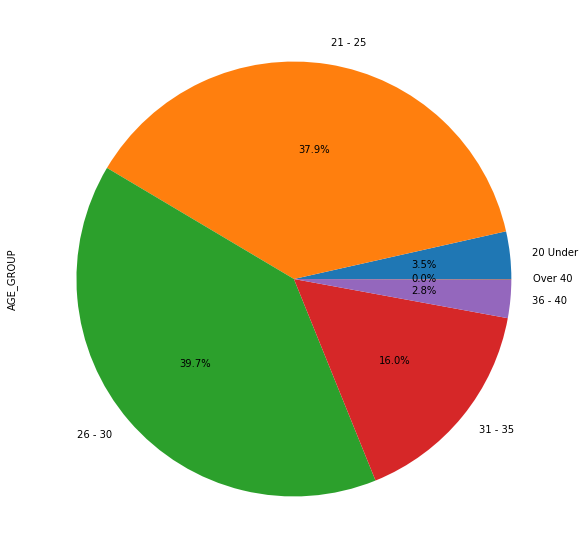

In [16]:
#Pie chart of NBA players AGE

NBA.groupby(["AGE_GROUP"])["AGE_GROUP"].count().plot(subplots=True, kind='pie', figsize=(20,10), autopct='%1.1f%%')

```
As you can see most age group for the NBA active players is between 21-25 and 26-30, so we can conclude that these are the NBA players golden age to play.

but we all want to start playing for the NBA as soon as we can right?  because we can have a bigger chace to have the longevity on the NBA 
```

So lets find out the youngest player in the NBA

In [17]:
NBA.loc[NBA['AGE'].idxmin()]

PLAYER       Frank Ntilikina
TEAM                     NYK
AGE                       19
SEASON               2017-18
GP                        78
W                         28
L                         50
MIN                     21.9
PTS                      5.9
FGM                      2.3
FGA                      6.4
FG%                     36.4
3PM                      0.6
3PA                        2
3P%                     31.8
FTM                      0.6
FTA                      0.9
FT%                     72.1
OREB                     0.5
DREB                     1.8
REB                      2.3
AST                      3.2
TOV                      1.7
STL                      0.8
BLK                      0.2
PF                       2.3
FP                        15
DD2                        1
TD3                        0
+/-                     -1.3
rankings                  74
position                   G
height                   6-5
AGE_GROUP           20 Under
Name: 1004, dt

```
The youngest player in the NBA is 'Frank Ntilikina' who is at 19 year old and already play in the NBA
```

but is there any 19 year old in the league?

In [18]:
NBA.loc[NBA['AGE'] == 19].count()

PLAYER       13
TEAM         13
AGE          13
SEASON       13
GP           13
W            13
L            13
MIN          13
PTS          13
FGM          13
FGA          13
FG%          13
3PM          13
3PA          13
3P%          13
FTM          13
FTA          13
FT%          13
OREB         13
DREB         13
REB          13
AST          13
TOV          13
STL          13
BLK          13
PF           13
FP           13
DD2          13
TD3          13
+/-          13
rankings     13
position     13
height       13
AGE_GROUP    13
dtype: int64

#### So by data we can conclude that at 19 year old you can already play in the league because there are 13 other player at the same age

## 2.

### Second thing and the most important thing is our height, we all know that basketball is type of sport that need height advantage more than any other sport, because the more tall we are the closest our hand to the basket

In [19]:
NBA.head(3)

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,position,height,AGE_GROUP
0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,3.8,30.8,2.4,3.6,67.4,1.7,5.9,7.7,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0,F,6-9,21 - 25
2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,2.3,37.5,0.9,1.2,77.3,0.3,1.6,1.8,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0,F,6-6,26 - 30
5,Al Horford,PHI,34,2019-20,67,39,28,30.2,11.9,4.8,10.6,45.0,1.5,4.2,35.0,0.9,1.2,76.3,1.5,5.3,6.8,4.0,1.2,0.8,0.9,2.1,30.0,6.0,0.0,1.9,80.0,C-F,6-10,31 - 35


because the data is in feet & inches i want to convert it to centimeter just make it relatable and easier to process

```
The height data is 'Feet-Inch'

1 Feet = 30.48 cm
1 Inch = 2.54 cm
```

So i want to convert it one by one to centimeter then sum it to make it one total height column

In [50]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2417
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER        2045 non-null   object 
 1   TEAM          2045 non-null   object 
 2   AGE           2045 non-null   int64  
 3   SEASON        2045 non-null   object 
 4   GP            2045 non-null   int64  
 5   W             2045 non-null   int64  
 6   L             2045 non-null   int64  
 7   MIN           2045 non-null   float64
 8   PTS           2045 non-null   float64
 9   FGM           2045 non-null   float64
 10  FGA           2045 non-null   float64
 11  FG%           2045 non-null   float64
 12  3PM           2045 non-null   float64
 13  3PA           2045 non-null   float64
 14  3P%           2045 non-null   float64
 15  FTM           2045 non-null   float64
 16  FTA           2045 non-null   float64
 17  FT%           2045 non-null   float64
 18  OREB          2045 non-null 

In [49]:
# Change the datatype from object to string so i can slice it

NBA['height'] = NBA['height'].astype('string')

In [21]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2417
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PLAYER     2045 non-null   object 
 1   TEAM       2045 non-null   object 
 2   AGE        2045 non-null   int64  
 3   SEASON     2045 non-null   object 
 4   GP         2045 non-null   int64  
 5   W          2045 non-null   int64  
 6   L          2045 non-null   int64  
 7   MIN        2045 non-null   float64
 8   PTS        2045 non-null   float64
 9   FGM        2045 non-null   float64
 10  FGA        2045 non-null   float64
 11  FG%        2045 non-null   float64
 12  3PM        2045 non-null   float64
 13  3PA        2045 non-null   float64
 14  3P%        2045 non-null   float64
 15  FTM        2045 non-null   float64
 16  FTA        2045 non-null   float64
 17  FT%        2045 non-null   float64
 18  OREB       2045 non-null   float64
 19  DREB       2045 non-null   float64
 20  REB     

In [22]:
# Slice the data to get the feet and the inch

NBA['height_feet'] = NBA['height'].str.slice(0,1) 
NBA['height_inch'] = NBA['height'].str.slice(2,4)

# Change the datatype to int

NBA['height_feet'] = NBA['height_feet'].astype(int)
NBA['height_inch'] = NBA['height_inch'].astype(int)

# Convert it to centimeter

NBA['feet_in_cm'] = NBA['height_feet'].multiply(30.48)
NBA['inch_in_cm'] = NBA['height_inch'].multiply(2.54)

# Then total it to one column

NBA['height_in_cm'] = NBA['feet_in_cm'] + NBA['height_inch']

In [23]:
NBA.head(3)

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,position,height,AGE_GROUP,height_feet,height_inch,feet_in_cm,inch_in_cm,height_in_cm
0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,3.8,30.8,2.4,3.6,67.4,1.7,5.9,7.7,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0,F,6-9,21 - 25,6,9,182.88,22.86,191.88
2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,2.3,37.5,0.9,1.2,77.3,0.3,1.6,1.8,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0,F,6-6,26 - 30,6,6,182.88,15.24,188.88
5,Al Horford,PHI,34,2019-20,67,39,28,30.2,11.9,4.8,10.6,45.0,1.5,4.2,35.0,0.9,1.2,76.3,1.5,5.3,6.8,4.0,1.2,0.8,0.9,2.1,30.0,6.0,0.0,1.9,80.0,C-F,6-10,31 - 35,6,10,182.88,25.40,192.88


Now the data is ready to use

In [287]:
NBA.head(5)

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,position,height,AGE_GROUP,height_feet,height_inch,feet_in_cm,inch_in_cm,height_in_cm
0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,3.8,30.8,2.4,3.6,67.4,1.7,5.9,7.7,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0,F,6-9,21 - 25,6,9,182.88,22.86,191.88
2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,2.3,37.5,0.9,1.2,77.3,0.3,1.6,1.8,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0,F,6-6,26 - 30,6,6,182.88,15.24,188.88
5,Al Horford,PHI,34,2019-20,67,39,28,30.2,11.9,4.8,10.6,45.0,1.5,4.2,35.0,0.9,1.2,76.3,1.5,5.3,6.8,4.0,1.2,0.8,0.9,2.1,30.0,6.0,0.0,1.9,80.0,C-F,6-10,31 - 35,6,10,182.88,25.40,192.88
6,Al-Farouq Aminu,ORL,29,2019-20,18,7,11,21.1,4.3,1.4,4.8,29.1,0.5,2.0,25.0,1.1,1.6,65.5,1.3,3.5,4.8,1.2,0.9,1.0,0.4,1.5,15.3,1.0,0.0,-1.9,75.0,F,6-9,26 - 30,6,9,182.88,22.86,191.88
7,Alec Burks,PHI,28,2019-20,66,21,45,26.6,15.0,4.9,11.6,41.8,1.8,4.6,38.5,3.6,4.0,88.7,0.7,3.5,4.3,2.9,1.4,0.9,0.3,1.9,26.7,1.0,0.0,-3.4,77.0,G,6-6,26 - 30,6,6,182.88,15.24,188.88


Text(0, 0.5, 'Frequency')

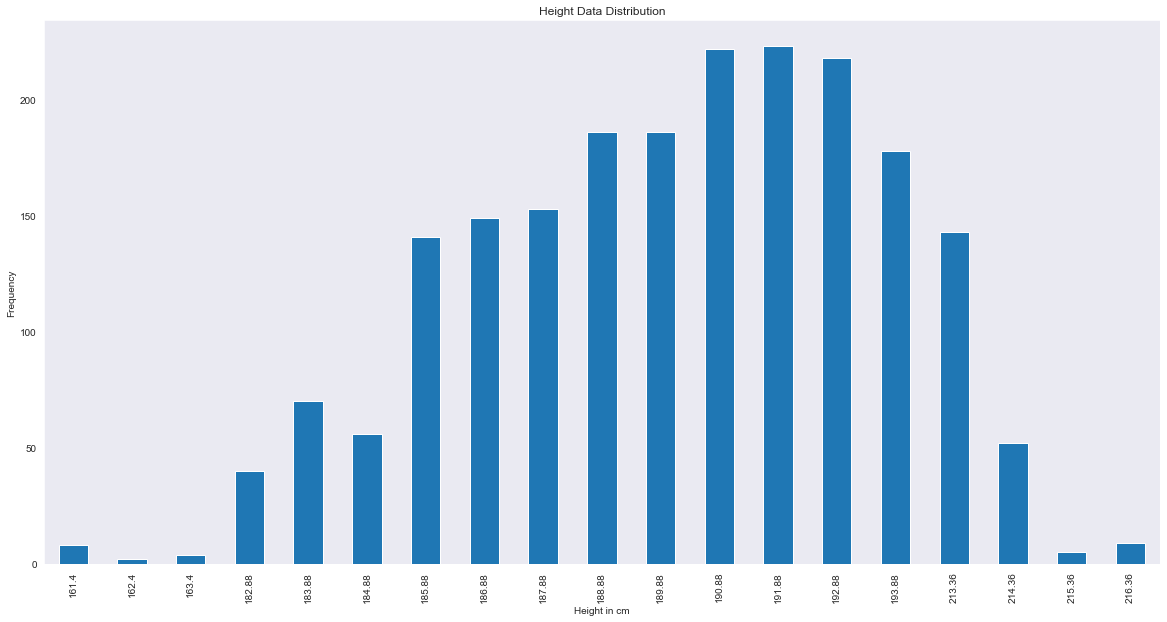

In [54]:
sns.set_style("dark")
NBA.groupby(["height_in_cm"])["height_in_cm"].count().plot(kind="bar", figsize=(20,10))
plt.title("Height Data Distribution")
plt.xlabel("Height in cm")
plt.ylabel("Frequency")

From the bar chart we can see that the most height that NBA players had is 191.88 cm

```
To see the height data more detail we use central tendency to see the max, mode, median, mean, and min of the data
```


In [286]:
# Central Tendency

print('Central Tendency')
print("Max : " +str(NBA['height_in_cm'].max()) + " cm")
print("Mode : " +str(NBA['height_in_cm'].mode()[0])+ " cm")
print("Median : " +str(NBA['height_in_cm'].median())+ " cm")
print("Mean : " +str(NBA['height_in_cm'].mean())+ " cm")
print("Min : " +str(NBA['height_in_cm'].min())+ " cm")

Central Tendency
Max : 216.36 cm
Mode : 191.88 cm
Median : 190.88 cm
Mean : 191.9135452322762 cm
Min : 161.4 cm


```
We can conclude from data above that :
1. Tallest NBA player : 216.36 cm
2. NBA players common height is 191.88 cm
3. Tha average of NBA players is 191.91 cm
4. Shortest NBA player : 161.4 cm
```

I want to know who is the shortest player in the NBA 

In [25]:
NBA.loc[NBA['height_in_cm'].idxmin()]

PLAYER          Isaiah Thomas
TEAM                      WAS
AGE                        31
SEASON                2019-20
GP                         40
W                          14
L                          26
MIN                      23.1
PTS                      12.2
FGM                       4.4
FGA                      10.7
FG%                      40.8
3PM                         2
3PA                       4.7
3P%                      41.3
FTM                       1.6
FTA                       1.9
FT%                      81.6
OREB                      0.3
DREB                      1.4
REB                       1.7
AST                       3.7
TOV                       1.9
STL                       0.3
BLK                       0.2
PF                        1.9
FP                       19.2
DD2                         1
TD3                         0
+/-                        -5
rankings                   77
position                    G
height                    5-9
AGE_GROUP 

In [26]:
NBA['position'].loc[NBA['PLAYER'] == 'Isaiah Thomas']

192     G
650     G
1029    G
1433    G
1815    G
2187    G
Name: position, dtype: object

```
The shortest player in the NBA is Isaiah Thomas with 161.4 cm in Guard position, it means that if we want to make it to the NBA we have to be atleast as tall as him, but i think he is must be a skillfull player with all bags of moves and speed pace because as an 161.4 cm player is a little bit hard to play because is almost 30 cm difference from the average NBA height.
```

Now i want to show you the minimum height for your specific position as an NBA player

In [27]:
NBA['position'].value_counts()

G      730
F      511
C      208
F-C    190
G-F    177
C-F    122
F-G    107
Name: position, dtype: int64

```
G = Guard
F = Forward
C = Center
F-C / C-F = can play Forward or Center
G-F / F-G = can play Guard or Forward
```

Guard

In [44]:
NBA_G = NBA.loc[NBA['position'] == 'G']
print("Min : " +str(NBA_G['height_in_cm'].min())+ " cm")


Min : 161.4 cm


Center

In [45]:
NBA_C = NBA.loc[NBA['position'] == 'C']
print("Min : " +str(NBA_C['height_in_cm'].min())+ " cm")

Min : 191.88 cm


Forward

In [46]:
NBA_F = NBA.loc[NBA['position'] == 'F']
print("Min : " +str(NBA_F['height_in_cm'].min())+ " cm")

Min : 188.88 cm


Forward or Center

In [47]:
NBA_CF = NBA[NBA['position'].str.contains('C-F') | NBA['position'].str.contains('F-C')]
print("Min : " +str(NBA_CF['height_in_cm'].min())+ " cm")

Min : 188.88 cm


Guard or Forward

In [48]:
NBA_GF = NBA[NBA['position'].str.contains('G-F') | NBA['position'].str.contains('F-G')]
print("Min : " +str(NBA_GF['height_in_cm'].min())+ " cm")

Min : 186.88 cm


```
From the data above we can say that every position have different kind of minimun height 

1. Guard : 161.4 cm
2. Center : 191.88 cm
3. Forward : 188.88 cm
4. Forward or Center : 188.88 cm
5. Guard or Forward : 186.88 cm

it means that if you are short, the position that you can be is Guard
```

## 3.

### Now i want to show you every position statistics so you can focus on your training based on your position

Here are the comparison between all position

Offense

Text(0, 0.5, 'Frequency')

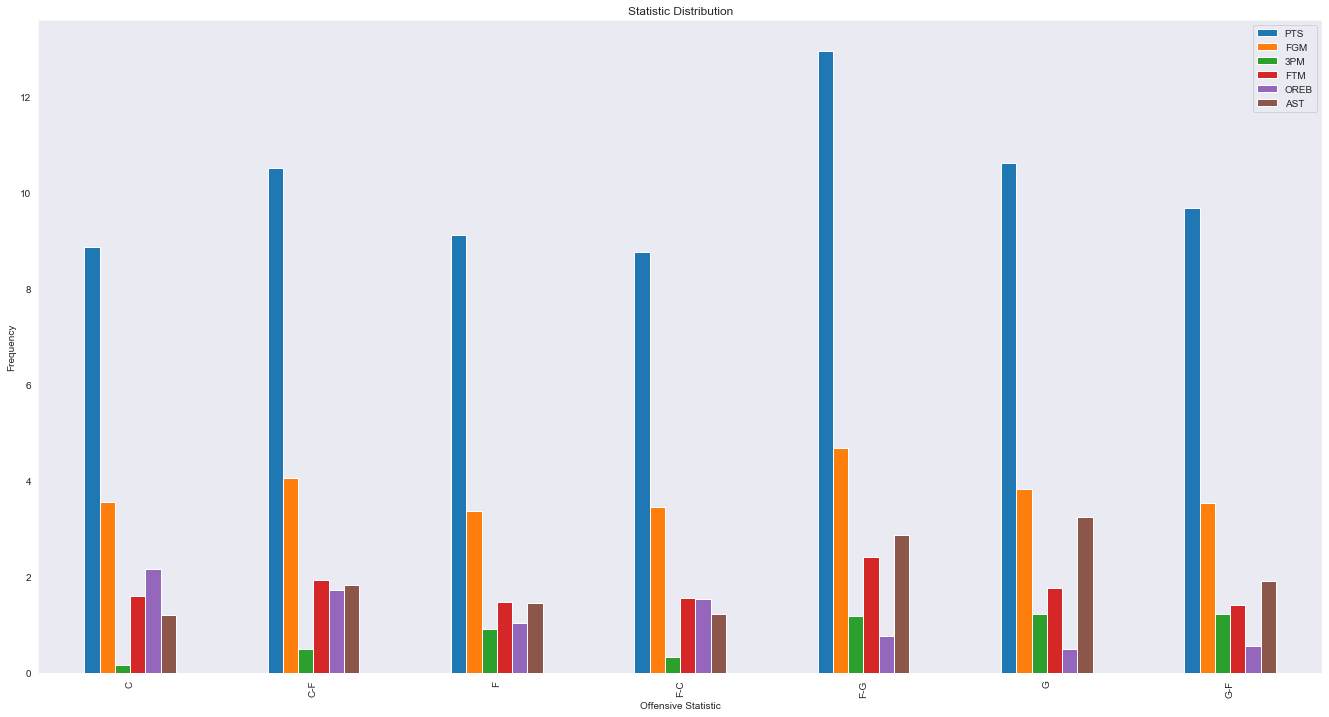

In [167]:
sns.set_style("dark")
NBA.groupby(["position"])[["PTS", "FGM", "3PM", "FTM",  "OREB", "AST"]].mean().plot(kind="bar", figsize=(23,12))
plt.title("Statistic Distribution")
plt.xlabel("Offensive Statistic")
plt.ylabel("Frequency")

```
1. PTS (Points)
On this section mostly Guard and Forward are responsible

2. FGM (Field Goal Made)
On this section mostly Forward and Center are responsible because they used to scored from inside of the 3 point line 

3. 3PM (3 Point Made)
On this section are mostly the guards are responsible, because they rarely go inside to finish under the basket

4. FTM (Free Throw Made)
On this section theres no significant difference, all the position has to make the freethrow 

5. OREB (Offensive Rebound)
On this section mostly center are responsible because of their positions in the game

6. AST
On this section mostly Guard and Forward are responsible
```

Defense

Text(0, 0.5, 'Frequency')

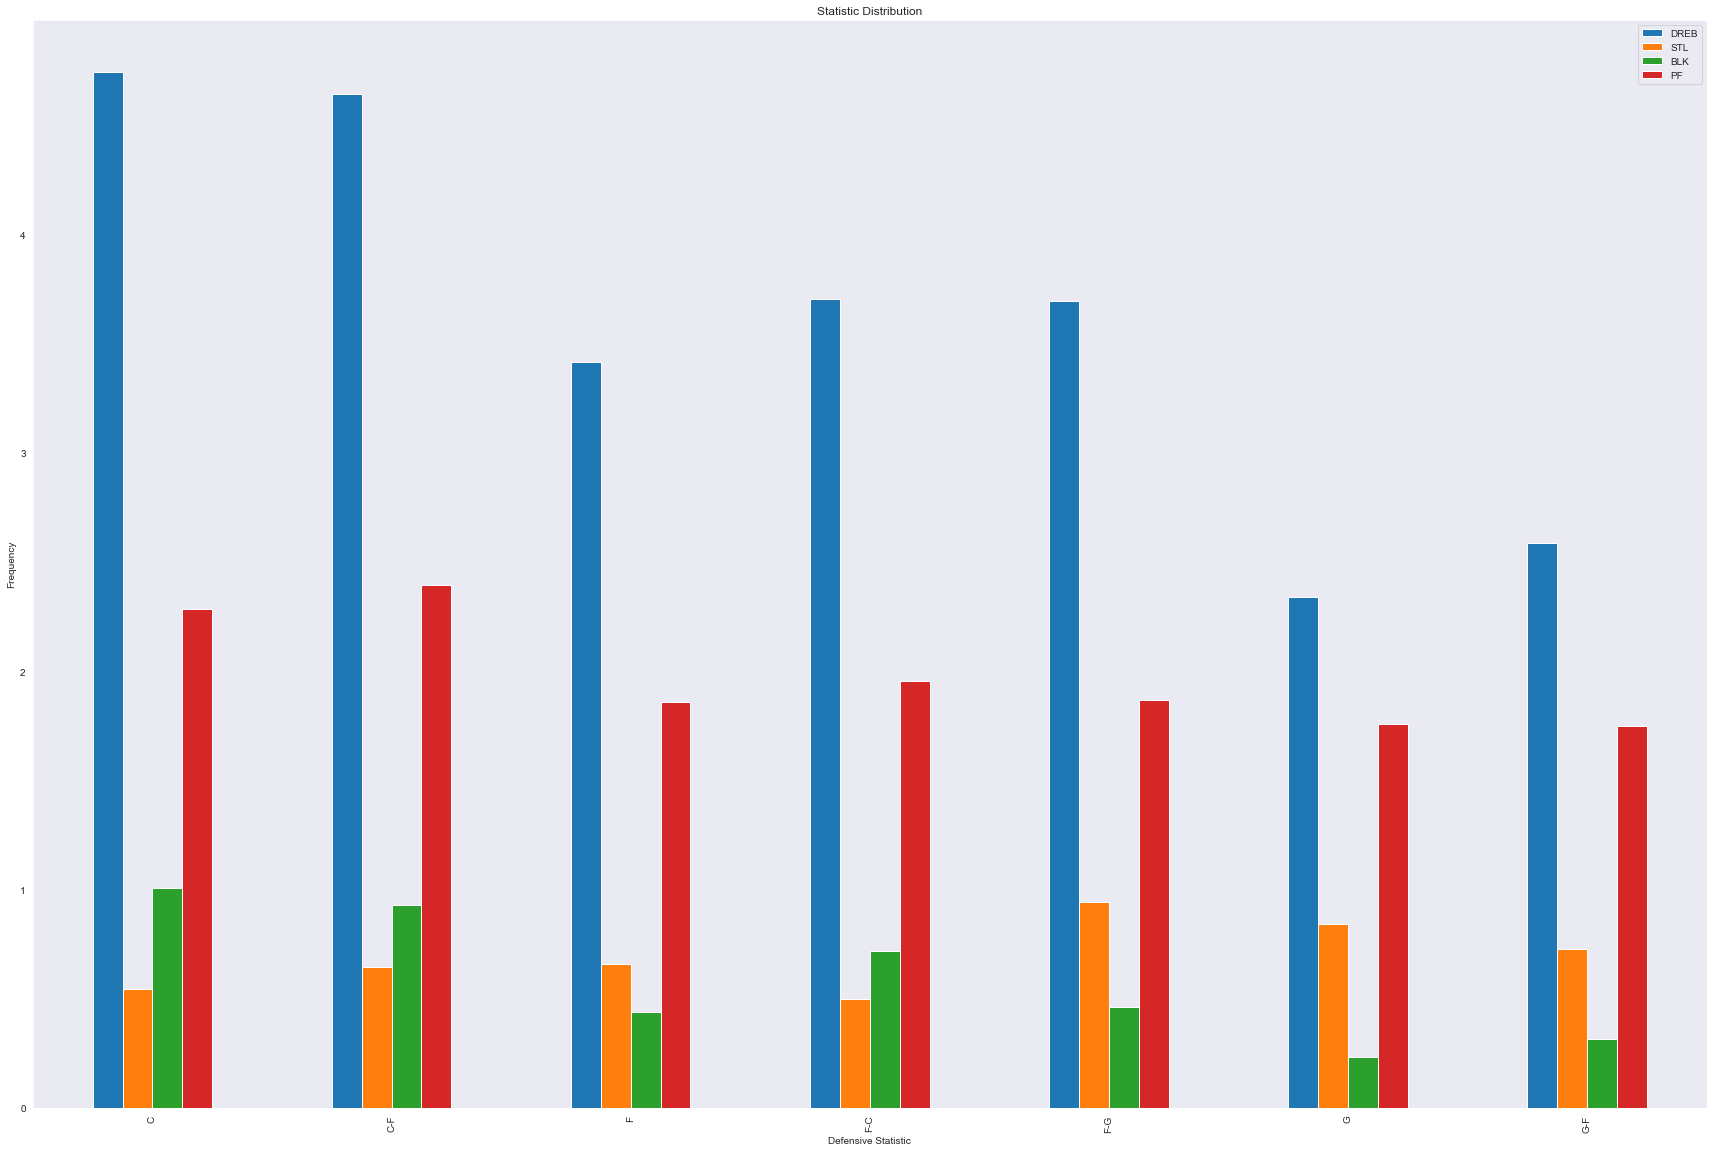

In [189]:
sns.set_style("dark")
NBA.groupby(["position"])[["DREB", "STL", "BLK", "PF"]].mean().plot(kind="bar", figsize=(30,20))
plt.title("Statistic Distribution")
plt.xlabel("Defensive Statistic")
plt.ylabel("Frequency")

```
1. DREB (Defensive Rebound)
On this section Center and Forward are responsible 

2. STL (Steal)
On this section the Guards are responsible for keeping the pick pocket on

3. BLK (Block)
On this section Center are responsible

4. PF (Personal Foul)
On this section the forwards and the center are responsible to give the fouls for the sake on paint defense

```

## 4.

### Lastly, when you already played in the NBA we want to be the best player in the league right? So we have to match ourself to the best player 

I want to see top 5 best player from last 3 season based on their rankings

#### 2019-20

In [209]:
df2 = NBA.loc[(NBA['SEASON'] == '2019-20')]
df2 = df2.sort_values(['rankings'], ascending=False)
df2 = df2.head(5)
df2

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,position,height,AGE_GROUP,height_feet,height_inch,feet_in_cm,inch_in_cm,height_in_cm
173,Giannis Antetokounmpo,MIL,25,2019-20,63,51,12,30.4,29.5,10.9,19.7,55.3,1.4,4.7,30.4,6.3,10.0,63.3,2.2,11.4,13.6,5.6,3.7,1.0,1.0,3.1,56.6,56.0,4.0,10.8,97.0,F-G,6-11,21 - 25,6,11,182.88,27.94,193.88
316,LeBron James,LAL,35,2019-20,67,50,17,34.6,25.3,9.6,19.4,49.3,2.2,6.3,34.8,3.9,5.7,69.3,1.0,6.9,7.8,10.2,3.9,1.2,0.5,1.8,51.3,46.0,13.0,6.6,97.0,F-G,6-8,31 - 35,6,8,182.88,20.32,190.88
212,James Harden,HOU,30,2019-20,68,43,25,36.5,34.3,9.9,22.3,44.4,4.4,12.4,35.5,10.2,11.8,86.5,1.0,5.5,6.6,7.5,4.5,1.8,0.9,3.3,57.1,22.0,4.0,4.2,96.0,G,6-5,26 - 30,6,5,182.88,12.70,187.88
279,Kawhi Leonard,LAC,29,2019-20,57,41,16,32.4,27.1,9.3,19.9,47.0,2.2,5.7,37.8,6.2,7.1,88.6,0.9,6.1,7.1,4.9,2.6,1.8,0.6,2.0,47.4,13.0,1.0,8.4,96.0,F,6-7,26 - 30,6,7,182.88,17.78,189.88
23,Anthony Davis,LAL,27,2019-20,62,46,16,34.4,26.1,8.9,17.7,50.3,1.2,3.5,33.0,7.2,8.5,84.6,2.3,7.0,9.3,3.2,2.5,1.5,2.3,2.5,50.9,29.0,0.0,3.9,95.0,F-C,6-10,26 - 30,6,10,182.88,25.40,192.88


#### 2018-19

In [214]:
df3 = NBA.loc[(NBA['SEASON'] == '2018-19')]
df3 = df3.sort_values(['rankings'], ascending=False)
df3 = df3.head(5)
df3

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,position,height,AGE_GROUP,height_feet,height_inch,feet_in_cm,inch_in_cm,height_in_cm
739,LeBron James,LAL,34,2018-19,55,28,27,35.2,27.4,10.1,19.9,51.0,2.0,5.9,33.9,5.1,7.6,66.5,1.0,7.4,8.5,8.3,3.6,1.3,0.6,1.7,52.0,32.0,8.0,2.1,97.0,F-G,6-8,31 - 35,6,8,182.88,20.32,190.88
709,Kawhi Leonard,TOR,28,2018-19,60,41,19,34.0,26.6,9.3,18.8,49.6,1.9,5.0,37.1,6.1,7.1,85.4,1.3,6.0,7.3,3.3,2.0,1.8,0.4,1.5,44.8,14.0,0.0,5.9,97.0,F,6-7,26 - 30,6,7,182.88,17.78,189.88
667,James Harden,HOU,29,2018-19,78,51,27,36.8,36.1,10.8,24.5,44.2,4.8,13.2,36.8,9.7,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,3.1,58.7,34.0,7.0,4.6,96.0,G,6-5,26 - 30,6,5,182.88,12.70,187.88
717,Kevin Durant,GSW,30,2018-19,78,54,24,34.6,26.0,9.2,17.7,52.1,1.8,5.0,35.3,5.7,6.5,88.5,0.4,5.9,6.4,5.9,2.9,0.7,1.1,2.0,45.0,16.0,2.0,8.4,96.0,F-G,6-9,26 - 30,6,9,182.88,22.86,191.88
636,Giannis Antetokounmpo,MIL,24,2018-19,72,56,16,32.8,27.7,10.0,17.3,57.8,0.7,2.8,25.6,6.9,9.5,72.9,2.2,10.3,12.5,5.9,3.7,1.3,1.5,3.2,56.2,54.0,5.0,9.1,96.0,F-G,6-11,21 - 25,6,11,182.88,27.94,193.88


#### 2017-18

In [217]:
df4 = NBA.loc[(NBA['SEASON'] == '2017-18')]
df4 = df4.sort_values(['rankings'], ascending=False)
df4 = df4.head(5)
df4

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings,position,height,AGE_GROUP,height_feet,height_inch,feet_in_cm,inch_in_cm,height_in_cm
1130,LeBron James,CLE,33,2017-18,82,50,32,36.9,27.5,10.5,19.3,54.2,1.8,5.0,36.7,4.7,6.5,73.1,1.2,7.5,8.6,9.1,4.2,1.4,0.9,1.7,54.1,52.0,18.0,1.3,98.0,F-G,6-8,31 - 35,6,8,182.88,20.32,190.88
1109,Kevin Durant,GSW,29,2017-18,68,49,19,34.2,26.4,9.3,18.0,51.6,2.5,6.1,41.9,5.3,5.9,88.9,0.5,6.4,6.8,5.4,3.0,0.7,1.8,2.0,47.0,15.0,2.0,5.2,97.0,F-G,6-9,26 - 30,6,9,182.88,22.86,191.88
1049,James Harden,HOU,28,2017-18,72,59,13,35.4,30.4,9.0,20.1,44.9,3.7,10.0,36.7,8.7,10.1,85.8,0.6,4.8,5.4,8.8,4.4,1.8,0.7,2.3,53.0,31.0,4.0,7.3,96.0,G,6-5,26 - 30,6,5,182.88,12.70,187.88
1231,Stephen Curry,GSW,30,2017-18,51,41,10,32.0,26.4,8.4,16.9,49.5,4.2,9.8,42.3,5.5,5.9,92.1,0.7,4.4,5.1,6.1,3.0,1.6,0.2,2.2,43.8,5.0,0.0,9.5,95.0,G,6-3,26 - 30,6,3,182.88,7.62,185.88
1101,Kawhi Leonard,SAS,27,2017-18,9,5,4,23.3,16.2,5.8,12.3,46.8,1.2,3.9,31.4,3.4,4.2,81.6,0.7,4.0,4.7,2.3,1.8,2.0,1.0,1.0,32.5,0.0,0.0,1.9,94.0,F,6-7,26 - 30,6,7,182.88,17.78,189.88


```
From the last 3 season theres always one name that always shows up neither on the first rank or second, the name is "LeBron James". I will take the highest ranking LeBron on the 2017-18 season and see his statistics 
```

In [255]:
Lebron = df4[(df4["PLAYER"] == "LeBron James")].groupby(df4["PLAYER"])["PTS", "FGM", "3PM", "FTM",  "OREB", "AST","DREB", "STL", "BLK", "PF"].mean().T
Lebron


c:\Users\anzah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


PLAYER,LeBron James
PTS,27.5
FGM,10.5
3PM,1.8
FTM,4.7
OREB,1.2
AST,9.1
DREB,7.5
STL,1.4
BLK,0.9
PF,1.7


Now i want to compare lebron average vs season average

In [283]:
df_new = NBA.loc[(NBA['SEASON'] == '2017-18')]
df_new = df_new[["PTS", "FGM", "3PM", "FTM",  "OREB", "AST","DREB", "STL", "BLK", "PF"]]
df_new = df_new.mean().T
df_new

PTS     9.599740
FGM     3.570052
3PM     0.925781
FTM     1.535938
OREB    0.902344
AST     2.114063
DREB    3.084375
STL     0.700781
BLK     0.446615
PF      1.817448
dtype: float64

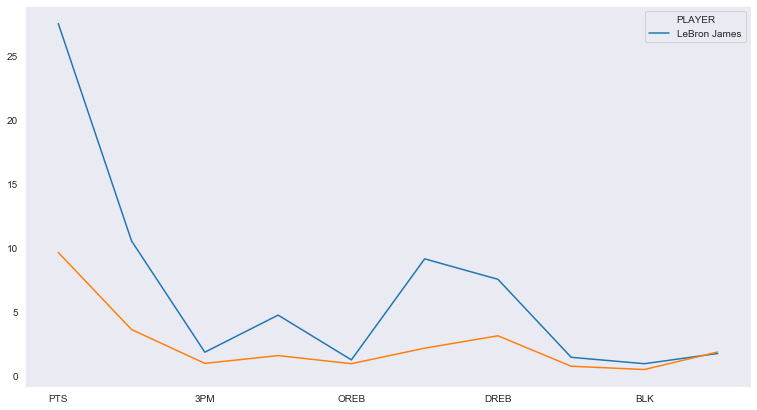

In [284]:
Lebron.plot(figsize=(13,7))
df_new.plot(figsize=(13,7))

### As you can see his stats are all way above the average of anybody else, so thats why he is the best in the league. So to continue of pursuing to become the best player in the NBA we have to follow his routine and practices

## 5.

### Since we talk about LeBron, i want to check whether scoring average is significantly changes or not in the last 5 season, we will perform the single sample one sided and set the significance level of 0.05. We use this method since we only test a variable and compare the sample (current season) and the population (we assume it is the last 5 season data).

In [272]:
Lebron_recent = NBA.loc[(NBA['PLAYER'] == 'LeBron James') & (NBA['SEASON'] == '2019-20')]
Lebron_recent["PTS"]

316    25.3
Name: PTS, dtype: float64

In [281]:
Lebron_population = NBA.loc[(NBA['PLAYER'] == 'LeBron James') & ((NBA['SEASON'] == '2018-19') | (NBA['SEASON'] == '2017-18') | (NBA['SEASON'] == '2016-17') | (NBA['SEASON'] == '2015-16') | (NBA['SEASON'] == '2014-15'))]
Lebron_population['PTS'].mean()

26.380000000000003

Hypothesis on this case:

**H0: μ <= 25.3**

**H1: μ > 25.3**

In [279]:
t_stat,p_val = stats.ttest_1samp(Lebron_population.PTS, 25.3)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.044059525343482286
t-statistics: 2.245133024800377


Since our p-value is less than `0.05`, so we reject the null hypothesis and we can conclude that this year LeBron James point is significanly different between last 5 years. 

# Conclusions :

From all the analysis above we can conclude that :


```
- The Average age of the nba player is 26 - 30 year old

- Your minimum height to play in the NBA is 161.4 cm, the height belongs to Isaiah Thomas played as Guard

- The skill you have to own is depend on the position you play

if you play :

- Guard, you have to train your offensive set of skill especially in 3 Point made and Assist

- Center, you have to train your defensive set of skill especially rebound and block because you will be guarding the paint all the time

- Forward, this position is a little bit both guard and center because you have to the offense and the defense at the saeme time

- LeBron James is the top rank player, and he average 

PTS	27.5
FGM	10.5
3PM	1.8
FTM	4.7
OREB	1.2
AST	9.1
DREB	7.5
STL	1.4
BLK	0.9
PF	1.7

vs the average of the league in the same season

PTS     9.599740
FGM     3.570052
3PM     0.925781
FTM     1.535938
OREB    0.902344
AST     2.114063
DREB    3.084375
STL     0.700781
BLK     0.446615
PF      1.817448
```